In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.style.use('ggplot')

In [2]:
os.chdir('C:\\Users\\user\\OneDrive\\바탕 화면\\이현방\\빅콘테스트\\Seafood_Import_Price_Prediction\\DATA')

In [3]:
root = os.path.join(os.getcwd(), '강수량데이터20151228_20210818')

In [4]:
rwt = pd.read_csv(os.path.join(root, 'rwt.csv'),encoding='utf-8') 

rwt

,Unnamed: 0,지점,지점명,일시,풍속,강수량,기온
0,0,1001,얀마이엔,2015-12-28 03:00,11.0,NaN,2.3
1,1,1001,얀마이엔,2015-12-28 06:00,13.0,0.0,2.6
2,2,1001,얀마이엔,2015-12-28 09:00,11.0,NaN,3.3
3,3,1001,얀마이엔,2015-12-28 12:00,13.0,0.1,3.4
4,4,1001,얀마이엔,2015-12-28 15:00,15.0,NaN,3.7
...,...,...,...,...,...,...,...
1960999,130209,85934,푼타아레나스,2021-08-17 06:00,8.0,0.0,5.3
1961000,130210,85934,푼타아레나스,2021-08-17 09:00,11.0,NaN,5.2
1961001,130211,85934,푼타아레나스,2021-08-17 12:00,12.0,1.0,4.3
1961002,130212,85934,푼타아레나스,2021-08-17 18:00,10.0,2.0,4.7


In [5]:
rwt = rwt.iloc[:,1:] # 1열 제거

rwt

,지점,지점명,일시,풍속,강수량,기온
0,1001,얀마이엔,2015-12-28 03:00,11.0,NaN,2.3
1,1001,얀마이엔,2015-12-28 06:00,13.0,0.0,2.6
2,1001,얀마이엔,2015-12-28 09:00,11.0,NaN,3.3
3,1001,얀마이엔,2015-12-28 12:00,13.0,0.1,3.4
4,1001,얀마이엔,2015-12-28 15:00,15.0,NaN,3.7
...,...,...,...,...,...,...
1960999,85934,푼타아레나스,2021-08-17 06:00,8.0,0.0,5.3
1961000,85934,푼타아레나스,2021-08-17 09:00,11.0,NaN,5.2
1961001,85934,푼타아레나스,2021-08-17 12:00,12.0,1.0,4.3
1961002,85934,푼타아레나스,2021-08-17 18:00,10.0,2.0,4.7


In [6]:
rwt_nor = pd.DataFrame()

for i in [1373, 1007, 1233, 1114, 1098, 1002, 1317, 1152, 1028, 1008, 1415, 1001, 1212, 1492, 1384, 1241, 1403, 1065, 1196, 1271, 1026 ,1025,1465, 1238]:
    rwt_nor = rwt_nor.append(rwt[rwt['지점']==i])

rwt_nor = rwt_nor.sort_values(by=['지점','일시'])
rwt_nor # 노르웨이 풍속,강수량,기온

,지점,지점명,일시,풍속,강수량,기온
0,1001,얀마이엔,2015-12-28 03:00,11.0,NaN,2.3
1,1001,얀마이엔,2015-12-28 06:00,13.0,0.0,2.6
2,1001,얀마이엔,2015-12-28 09:00,11.0,NaN,3.3
3,1001,얀마이엔,2015-12-28 12:00,13.0,0.1,3.4
4,1001,얀마이엔,2015-12-28 15:00,15.0,NaN,3.7
...,...,...,...,...,...,...
1628492,1492,오슬로-블린데른,2020-06-01 18:00,3.0,NaN,24.0
1628493,1492,오슬로-블린데른,2020-06-01 21:00,1.0,NaN,17.0
1628494,1492,오슬로-블린데른,2020-06-02 00:00,1.0,0.1,13.1
1628495,1492,오슬로-블린데른,2020-06-02 03:00,1.0,NaN,11.8


In [7]:
rwt_nor['일시'] = rwt_nor['일시'].str[:10] # 시간 부분 삭제

rwt_nor['일시'] = rwt_nor['일시'].astype('datetime64')

rwt_nor

,지점,지점명,일시,풍속,강수량,기온
0,1001,얀마이엔,2015-12-28,11.0,NaN,2.3
1,1001,얀마이엔,2015-12-28,13.0,0.0,2.6
2,1001,얀마이엔,2015-12-28,11.0,NaN,3.3
3,1001,얀마이엔,2015-12-28,13.0,0.1,3.4
4,1001,얀마이엔,2015-12-28,15.0,NaN,3.7
...,...,...,...,...,...,...
1628492,1492,오슬로-블린데른,2020-06-01,3.0,NaN,24.0
1628493,1492,오슬로-블린데른,2020-06-01,1.0,NaN,17.0
1628494,1492,오슬로-블린데른,2020-06-02,1.0,0.1,13.1
1628495,1492,오슬로-블린데른,2020-06-02,1.0,NaN,11.8


In [8]:
rwt_nor = rwt_nor.query('일시.dt.dayofweek == 0')

rwt_nor['국가'] = '노르웨이'

rwt_nor

<ipython-input-8-aadc1cd92f3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rwt_nor['국가'] = '노르웨이'


,지점,지점명,일시,풍속,강수량,기온,국가
0,1001,얀마이엔,2015-12-28,11.0,NaN,2.3,노르웨이
1,1001,얀마이엔,2015-12-28,13.0,0.0,2.6,노르웨이
2,1001,얀마이엔,2015-12-28,11.0,NaN,3.3,노르웨이
3,1001,얀마이엔,2015-12-28,13.0,0.1,3.4,노르웨이
4,1001,얀마이엔,2015-12-28,15.0,NaN,3.7,노르웨이
...,...,...,...,...,...,...,...
1628489,1492,오슬로-블린데른,2020-06-01,3.0,NaN,12.8,노르웨이
1628490,1492,오슬로-블린데른,2020-06-01,1.0,NaN,18.1,노르웨이
1628491,1492,오슬로-블린데른,2020-06-01,2.0,NaN,22.9,노르웨이
1628492,1492,오슬로-블린데른,2020-06-01,3.0,NaN,24.0,노르웨이


In [9]:
rwt_nor['강수량'].isna().sum()

32300

In [10]:
rwt_nor['풍속'].isna().sum()

327

In [11]:
rwt_nor['풍속'][rwt_nor['풍속']<0] = np.nan # 오류값을 함부로 0으로 대치하는 것은 위험해보이고 일자별 평균값을 넣기엔 코드가 생각이 안남

rwt_nor['풍속'].unique()

<ipython-input-11-ef1882aca0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rwt_nor['풍속'][rwt_nor['풍속']<0] = np.nan # 오류값을 함부로 0으로 대치하는 것은 위험해보이고 일자별 평균값을 넣기엔 코드가 생각이 안남
C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([11., 13., 15., 12.,  1.,  0.,  2.,  3.,  4.,  8.,  9., 14., 10.,
        6.,  5.,  7., 20., 16., 21., 17., 18., 22., nan, 19., 27., 29.,
       23., 28., 25., 26., 24., 30.])

In [12]:
rwt_nor['기온'].isna().sum()

71

In [13]:
rwt_nor['기온'].unique()

array([  2.3,   2.6,   3.3,   3.4,   3.7,   4.3,   1.7,   2. ,   1.8,
         1.9,   1.6,   1.4,  -5.7,  -6.1,  -6.2,  -4.9,  -2.5,  -1.2,
        -0.7,  -7.7,  -7.6,  -7.5,  -7.1,  -6.8,  -6.4,  -6.9,   2.2,
         3. ,   3.6,   2.1,   0.8,  -0.2,  -0.4,  -0.8,  -3.3,  -4.2,
        -3.1,  -3.7,  -7.9,  -7.4,  -5.2,  -3. ,  -2.1,  -2. ,   0. ,
        -8.1,  -6.3,  -1. ,  -1.8,  -1.5,  -3.5,  -4.1,  -4.8,  -4.3,
        -4.4,  -2.8,  -3.4,  -0.5,  -1.7,  -1.4,  -1.1,   0.3,  -0.3,
        -0.1,   3.1,   5.5,   4.7,   3.5,   2.7,  -5.6,  -5.1,  -4. ,
        -5.5,  -6.5,  -7.8,  -7.3,  -7.2,   1.5,  -1.9,  -2.4,  -2.7,
        -1.3,  -0.9,  -6.6,  -6. ,  -3.6,   4.2,   4.4,   3.2,   1.2,
         0.6,  -2.9,  -2.3,  -2.2,   1.3,   4.5,   5.2,   5.8,   5.4,
         6.5,   5. ,   1. ,   2.8,   4.1,   4.9,   5.1,   5.3,   6.1,
         6.3,   6.4,   7.4,   7.6,   8.5,   8.9,   7.7,   7.9,   3.9,
         5.7,   4.6,   7.1,   5.9,   6.2,   5.6,   8.8,   9.2,   9. ,
        10.3,  11. ,

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


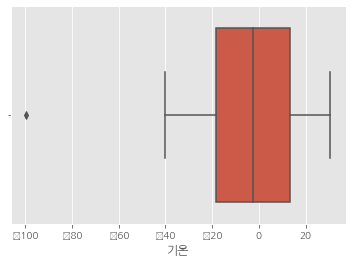

In [14]:
sns.boxplot(x = rwt_nor['기온'].unique())
plt.xlabel('기온')
plt.show()
# 이상치 제거 필요

In [15]:
rwt_nor['기온'][rwt_nor['기온']<-40] = np.nan

rwt_nor['기온'].unique()

<ipython-input-15-ba8f70cc6006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rwt_nor['기온'][rwt_nor['기온']<-40] = np.nan
C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([  2.3,   2.6,   3.3,   3.4,   3.7,   4.3,   1.7,   2. ,   1.8,
         1.9,   1.6,   1.4,  -5.7,  -6.1,  -6.2,  -4.9,  -2.5,  -1.2,
        -0.7,  -7.7,  -7.6,  -7.5,  -7.1,  -6.8,  -6.4,  -6.9,   2.2,
         3. ,   3.6,   2.1,   0.8,  -0.2,  -0.4,  -0.8,  -3.3,  -4.2,
        -3.1,  -3.7,  -7.9,  -7.4,  -5.2,  -3. ,  -2.1,  -2. ,   0. ,
        -8.1,  -6.3,  -1. ,  -1.8,  -1.5,  -3.5,  -4.1,  -4.8,  -4.3,
        -4.4,  -2.8,  -3.4,  -0.5,  -1.7,  -1.4,  -1.1,   0.3,  -0.3,
        -0.1,   3.1,   5.5,   4.7,   3.5,   2.7,  -5.6,  -5.1,  -4. ,
        -5.5,  -6.5,  -7.8,  -7.3,  -7.2,   1.5,  -1.9,  -2.4,  -2.7,
        -1.3,  -0.9,  -6.6,  -6. ,  -3.6,   4.2,   4.4,   3.2,   1.2,
         0.6,  -2.9,  -2.3,  -2.2,   1.3,   4.5,   5.2,   5.8,   5.4,
         6.5,   5. ,   1. ,   2.8,   4.1,   4.9,   5.1,   5.3,   6.1,
         6.3,   6.4,   7.4,   7.6,   8.5,   8.9,   7.7,   7.9,   3.9,
         5.7,   4.6,   7.1,   5.9,   6.2,   5.6,   8.8,   9.2,   9. ,
        10.3,  11. ,

In [16]:
wt_nor = pd.DataFrame(rwt_nor.groupby(['일시'])[['풍속','기온']].mean())

wt_nor

,풍속,기온
일시,,
2015-12-28,5.264286,-3.103401
2016-01-04,4.750000,-6.495031
2016-01-11,5.686391,-3.870690
2016-01-18,4.645714,-6.916477
2016-01-25,4.857143,0.376437
...,...,...
2020-04-27,3.581395,1.881111
2020-05-04,4.674847,2.882456
2020-05-18,3.426230,4.738760


In [17]:
wt_nor['기온'].unique()

array([-3.10340136e+00, -6.49503106e+00, -3.87068966e+00, -6.91647727e+00,
        3.76436782e-01, -1.55426829e+00,  7.25000000e-01, -3.58920455e+00,
       -1.27142857e+00, -3.07032258e+00, -7.45197740e-01,  3.15842697e+00,
       -1.34228571e+00,  4.15921788e+00,  3.78388889e+00,  1.34470588e+00,
        2.21888889e+00,  5.35329341e-01,  5.92921348e+00,  9.22888889e+00,
        5.81511628e+00,  8.39833333e+00,  1.16050000e+01,  9.99831461e+00,
        9.75393258e+00,  9.21000000e+00,  1.32355556e+01,  1.18164773e+01,
        1.27277778e+01,  1.18275281e+01,  1.47158192e+01,  1.11603352e+01,
        1.16627907e+01,  1.09344444e+01,  1.17853107e+01,  9.85771429e+00,
        9.11942857e+00,  1.04352601e+01,  1.15567416e+01,  1.11305882e+01,
        4.82290503e+00,  5.30681818e+00,  5.08192090e+00,  4.60611111e+00,
        3.90000000e+00, -4.12849162e+00,  3.79137931e+00,  7.93888889e-01,
       -1.00222222e+00,  9.52941176e-02, -2.87888889e+00,  3.42402235e+00,
       -2.82222222e-01, -

In [18]:
rwt_vit = pd.DataFrame()

for i in [48914, 48808, 48870, 48877, 48845, 48840, 48887, 48917, 48820]:
    rwt_vit = rwt_vit.append(rwt[rwt['지점']==i])

rwt_vit = rwt_vit.sort_values(by=['지점명','일시'])

rwt_vit['국가'] = '베트남'

rwt_vit # 베트남 풍속,강수량,기온

,지점,지점명,일시,풍속,강수량,기온,국가
122236,48914,까마우,2015-12-28 03:00,5.0,NaN,29.2,베트남
122237,48914,까마우,2015-12-28 06:00,5.0,NaN,30.6,베트남
122238,48914,까마우,2015-12-28 09:00,5.0,NaN,30.3,베트남
122239,48914,까마우,2015-12-28 12:00,2.0,NaN,28.2,베트남
122240,48914,까마우,2015-12-28 15:00,0.0,NaN,26.4,베트남
...,...,...,...,...,...,...,...
1858103,48917,푸꾸옥,2021-08-18 00:00,2.0,NaN,26.5,베트남
107856,48820,하노이,2016-12-12 06:00,2.0,NaN,28.0,베트남
107857,48820,하노이,2016-12-12 12:00,3.0,NaN,25.4,베트남
107858,48820,하노이,2016-12-12 18:00,2.0,NaN,23.1,베트남


In [19]:
rwt_vit['일시'] = rwt_vit['일시'].str[:10] # 시간 부분 삭제

rwt_vit['일시'] = rwt_vit['일시'].astype('datetime64')

rwt_vit = rwt_vit.query('일시.dt.dayofweek == 0')

rwt_vit

,지점,지점명,일시,풍속,강수량,기온,국가
122236,48914,까마우,2015-12-28,5.0,NaN,29.2,베트남
122237,48914,까마우,2015-12-28,5.0,NaN,30.6,베트남
122238,48914,까마우,2015-12-28,5.0,NaN,30.3,베트남
122239,48914,까마우,2015-12-28,2.0,NaN,28.2,베트남
122240,48914,까마우,2015-12-28,0.0,NaN,26.4,베트남
...,...,...,...,...,...,...,...
1858093,48917,푸꾸옥,2021-08-16,0.0,NaN,27.2,베트남
1858094,48917,푸꾸옥,2021-08-16,2.0,NaN,26.8,베트남
107856,48820,하노이,2016-12-12,2.0,NaN,28.0,베트남
107857,48820,하노이,2016-12-12,3.0,NaN,25.4,베트남


In [20]:
rwt_vit['강수량'].isna().sum()

13788

In [21]:
rwt_vit['풍속'].isna().sum()

1

In [22]:
rwt_vit['풍속'][rwt_vit['풍속']<0]

Series([], Name: 풍속, dtype: float64)

In [23]:
rwt_vit['기온'].isna().sum()

9

In [24]:
rwt_vit['기온'].unique()

array([29.2, 30.6, 30.3, 28.2, 26.4, 25.4, 24.4, 29.7, 31.1, 30.7, 27.8,
       26.8, 26.5, 26.1, 24.8, 29.3, 31.4, 31.9, 28.8, 27.2, 25.8, 25.6,
       30.1, 32.6, 31.2, 28.4, 27.4, 26.6, 24.3, 26. , 25. , 23.6, 29.9,
       31.5, 32. , 29. , 28. , 27. , 26.2, 22. , 24. , 30.8, 28.1, 24.6,
       31.3, 25.7, 31.6, 25.5, 25.3, 30.2, 30. , 27.1, 25.2, 29.6, 31.8,
       33.2, 26.7, 31. , 33. , 32.2, 29.4, 27.6, 27.3, 34. , 32.1, 28.3,
       34.3, 34.4, 28.6, 32.9, 35.2, 34.6, 29.8, 28.9, 33.8, 35. , 34.9,
       34.1, 36. , 30.4, 30.9, 34.2, 32.3, 27.7, 33.6, 24.2, 33.4, 32.8,
       30.5,  nan, 24.7, 27.5, 25.1, 28.7, 32.5, 23.9, 23.1, 22.6, 23.5,
       23. , 22.8, 26.3, 29.5, 27.9, 28.5, 24.9, 32.4, 33.1, 33.3, 26.9,
       32.7, 29.1, 31.7, 25.9, 24.1, 22.3, 22.5, 21.9, 20.6, 20. , 20.1,
       20.2, 20.4, 33.5, 23.8, 21.7, 23.2, 33.7, 23.4, 33.9, 16.6, 17.4,
       15.4, 14. , 13.8, 13.6, 14.7, 19.4, 19.3, 17.7, 16.2, 15.8, 18.4,
       17.8, 15. , 14.4, 14.2, 12.2, 16.3, 16. , 14

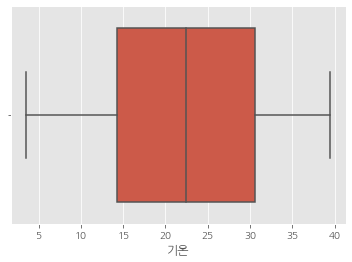

In [25]:
sns.boxplot(x = rwt_vit['기온'].unique())
plt.xlabel('기온')
plt.show()

# 이상치 없음.

In [26]:
wt_vit = pd.DataFrame(rwt_vit.groupby(['일시']).mean()[['풍속','기온']])

wt_vit = wt_vit[wt_vit.index<='2021-06-28']

wt_vit

,풍속,기온
일시,,
2015-12-28,2.375000,23.098214
2016-01-04,1.698413,24.654688
2016-01-11,2.015625,24.165625
2016-01-18,1.812500,23.739062
2016-01-25,3.250000,18.212500
...,...,...
2021-05-31,2.156250,31.271875
2021-06-07,2.078125,28.542188
2021-06-14,2.234375,29.495313


In [27]:
wt_vit.isna().sum()

풍속    0
기온    0
dtype: int64

In [28]:
wt_vit['풍속'].unique()

array([2.375     , 1.6984127 , 2.015625  , 1.8125    , 3.25      ,
       2.578125  , 2.46774194, 2.53125   , 2.046875  , 2.94642857,
       2.0625    , 2.265625  , 2.328125  , 2.75      , 2.203125  ,
       2.5       , 1.765625  , 2.390625  , 2.15625   , 2.1875    ,
       1.90625   , 1.921875  , 2.640625  , 2.140625  , 1.96875   ,
       2.21875   , 2.234375  , 2.109375  , 1.640625  , 2.078125  ,
       2.671875  , 1.75409836, 2.09375   , 1.671875  , 1.6875    ,
       1.65625   , 1.859375  , 1.21428571, 1.64285714, 1.25      ,
       1.953125  , 1.171875  , 1.46551724, 1.609375  , 2.65625   ,
       2.35416667, 2.3125    , 2.34375   , 2.421875  , 2.        ,
       1.91935484, 2.125     , 2.14516129, 1.984375  , 2.03125   ,
       1.890625  , 1.3125    , 1.62068966, 1.875     , 1.41935484,
       2.46875   , 1.828125  , 2.359375  , 2.171875  , 2.515625  ,
       2.609375  , 1.9375    , 2.18965517, 1.734375  , 2.59375   ,
       1.546875  , 2.921875  , 2.96875   , 2.484375  , 1.70312

In [29]:
wt_vit['기온'].unique()

array([23.09821429, 24.6546875 , 24.165625  , 23.7390625 , 18.2125    ,
       22.1640625 , 19.55666667, 22.0234375 , 22.89375   , 22.90714286,
       24.75      , 23.2       , 25.8765625 , 23.54375   , 26.778125  ,
       27.15625   , 26.6296875 , 28.3734375 , 29.6875    , 30.1359375 ,
       27.46875   , 28.2328125 , 28.5796875 , 29.2296875 , 31.0546875 ,
       28.4125    , 28.3125    , 29.9828125 , 29.740625  , 29.853125  ,
       29.421875  , 29.6453125 , 29.1046875 , 27.99206349, 28.09672131,
       29.1765625 , 25.790625  , 27.8390625 , 27.8       , 27.240625  ,
       27.3171875 , 27.1921875 , 26.63035714, 25.4125    , 26.6       ,
       27.2390625 , 26.6015873 , 24.1453125 , 24.721875  , 24.16034483,
       24.0578125 , 24.98125   , 24.465625  , 24.93958333, 22.5265625 ,
       22.428125  , 23.6484375 , 23.7359375 , 22.0796875 , 24.60625   ,
       22.8796875 , 24.3609375 , 25.80806452, 26.61875   , 24.47258065,
       24.809375  , 29.3953125 , 27.2671875 , 26.2390625 , 28.64